In [65]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os

import dotenv

dotenv.load_dotenv()

import pprint
from pprint import pp 
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')


from src.tradecli import *
from src.utils import *
from src.journal import *
import src.journal as jr

from src.analysis import *
import analysis

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts:/Users/tobiaspucher/.lmstudio/bin
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'COMMAND_MODE': 'unix2003',
 'CONDA_DEFAULT_ENV': 'base',
 'CONDA_EXE': '/Users/tobiaspucher/miniconda3/bin/conda',
 'CONDA_PREFIX': '/

In [66]:
# grab just last row
df = jr.get_full_df()

display(df.tail(4))

display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])


,trade_uid,potential_risk_reward,poi_1h_sc,TP_distance,SL_distance,type_1_M,type_1_m30,type_2_m1,potential_price,taken,outcome,type_3_m1,type_3_w,type_2_m15,numerical_confidence,type_3_d,account,type_2_M,type_1_w,entry_price,htf_poi_ltf_confirmation,type_1_m15,type_3_h4,poi_15m_sc,initial_return,poi_15m_liquidity_grab,type_1_h4,tp_price,type_2_d,poi_1h_liquidity_grab,side,close_price,sl_price,management_strategy,type_2_h1,type_3_m30,poi_1m_mitigation,entry_time,type_3_h1,poi_1m_sc,poi_1m_liquidity_grab,type_1_m5,session,potential_return,type_1_h1,initial_risk_reward,type_2_h4,type_3_m15,poi,poi_15m_mitigation,return,rr,unit_test,poi_1h_mitigation,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_close_early,management_strategy_no_management,outcome_be,outcome_loss,outcome_win
8,1013,NaN,<NA>,0.012360,0.005,<NA>,<NA>,True,NaN,<NA>,win,True,<NA>,<NA>,5.0,<NA>,test_account,<NA>,<NA>,1.1126,False,True,<NA>,<NA>,0.012360,<NA>,<NA>,1.124960,<NA>,<NA>,long,1.14280,1.1076,be_after_1r,<NA>,<NA>,<NA>,2025-03-06 02:24:16.909552211,<NA>,<NA>,<NA>,<NA>,tokyo,NaN,<NA>,2.471992,<NA>,<NA>,None,<NA>,0.03020,6.040000,True,<NA>,True,False,True,False,False,False,False,False,True
9,1014,NaN,<NA>,-0.026444,-0.005,<NA>,<NA>,<NA>,NaN,<NA>,loss,True,<NA>,<NA>,2.0,<NA>,test_account,True,True,1.1491,True,<NA>,<NA>,<NA>,-0.026444,<NA>,<NA>,1.122656,<NA>,<NA>,short,1.15605,1.1541,be_after_1r,<NA>,<NA>,<NA>,2025-02-24 02:31:06.405427017,<NA>,<NA>,<NA>,<NA>,tokyo,NaN,<NA>,5.288751,<NA>,<NA>,None,<NA>,0.00695,-1.390000,True,<NA>,False,True,True,False,False,False,False,True,False
10,2,NaN,<NA>,85.970000,3.090,<NA>,<NA>,<NA>,NaN,True,NaN,<NA>,<NA>,<NA>,NaN,<NA>,mt5_vantage,<NA>,<NA>,2914.0300,<NA>,<NA>,<NA>,<NA>,85.970000,<NA>,<NA>,3000.000000,<NA>,<NA>,long,NaN,2910.9400,no_management,<NA>,<NA>,<NA>,2025-02-18 14:10:00.000000000,<NA>,<NA>,<NA>,<NA>,new_york,NaN,<NA>,27.822006,<NA>,<NA>,None,<NA>,NaN,NaN,<NA>,<NA>,False,False,False,False,False,True,False,False,False
11,4,38.420694,True,-59.130000,-14.690,<NA>,<NA>,<NA>,21600.0,<NA>,NaN,True,<NA>,<NA>,5.0,<NA>,ideal,<NA>,<NA>,22164.4000,True,True,<NA>,False,-59.130000,False,<NA>,22105.270000,<NA>,True,short,22105.27000,22179.0900,be_after_push,<NA>,<NA>,False,2025-02-22 15:11:00.000000000,<NA>,True,False,True,new_york,-564.4,<NA>,4.025187,<NA>,<NA>,"(poi_1h_sc, poi_1h_liquidity_grab, poi_1m_sc)",False,-59.13000,4.025187,<NA>,False,False,True,False,True,False,False,False,False,False


,potential_risk_reward,TP_distance,SL_distance,potential_price,numerical_confidence,entry_price,initial_return,tp_price,close_price,sl_price,entry_time,potential_return,initial_risk_reward,return,rr
count,1.000000,12.000000,12.000000,1.0,11.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12,1.0,12.000000,11.000000,11.000000
mean,38.420694,2.223057,-0.968333,21600.0,3.636364,2090.809983,2.223057,2093.033040,2010.590873,2091.778317,2025-03-04 01:05:54.806678272,-564.4,6.835930,-5.380927,3.289562
min,38.420694,-59.130000,-14.690000,21600.0,1.000000,1.112100,-59.130000,1.066943,1.075950,1.107600,2025-02-17 03:22:49.365482234,-564.4,1.909320,-59.130000,-1.390000
25%,38.420694,-0.038650,-0.005000,21600.0,2.500000,1.114700,-0.038650,1.105910,1.107975,1.119575,2025-02-23 17:41:04.804070144,-564.4,3.197529,-0.032025,-0.370000
50%,38.420694,-0.021820,-0.005000,21600.0,4.000000,1.136400,-0.021820,1.125632,1.131850,1.136400,2025-03-04 15:02:07.267820288,-564.4,4.833779,-0.002850,3.910000
75%,38.420694,0.010250,0.005000,21600.0,5.000000,1.148500,0.010250,1.136932,1.145950,1.153500,2025-03-12 15:30:22.949894656,-564.4,7.729901,0.006275,5.315000
max,38.420694,85.970000,3.090000,21600.0,5.000000,22164.400000,85.970000,22105.270000,22105.270000,22179.090000,2025-03-16 04:09:20.089204198,-564.4,27.822006,0.030200,9.490000
std,NaN,31.374428,4.411683,NaN,1.433369,6376.764457,31.374428,6360.914217,6664.651095,6380.931675,NaN,NaN,7.021752,17.826567,3.859628


Index(['trade_uid', 'potential_risk_reward', 'poi_1h_sc', 'TP_distance',
       'SL_distance', 'type_1_M', 'type_1_m30', 'type_2_m1', 'potential_price',
       'taken', 'outcome', 'type_3_m1', 'type_3_w', 'type_2_m15',
       'numerical_confidence', 'type_3_d', 'account', 'type_2_M', 'type_1_w',
       'entry_price', 'htf_poi_ltf_confirmation', 'type_1_m15', 'type_3_h4',
       'poi_15m_sc', 'initial_return', 'poi_15m_liquidity_grab', 'type_1_h4',
       'tp_price', 'type_2_d', 'poi_1h_liquidity_grab', 'side', 'close_price',
       'sl_price', 'management_strategy', 'type_2_h1', 'type_3_m30',
       'poi_1m_mitigation', 'entry_time', 'type_3_h1', 'poi_1m_sc',
       'poi_1m_liquidity_grab', 'type_1_m5', 'session', 'potential_return',
       'type_1_h1', 'initial_risk_reward', 'type_2_h4', 'type_3_m15', 'poi',
       'poi_15m_mitigation', 'return', 'rr', 'unit_test', 'poi_1h_mitigation',
       'htf_poi_ltf_confirmation_False', 'htf_poi_ltf_confirmation_True',
       'management_strateg

In [67]:
from analysis import *
import analysis

def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points'})
    df = df[(df['account'] != ACC_TEST) & (True)]
    
    return df

df = prepare_data(jr.j.to_dataframe().copy())
 
type_X_cols = jr.PA.used_tags_in_df_not_null(df)

print(type_X_cols)



['type_3_m1', 'type_1_m15', 'type_1_m5']


In [68]:
calculate_performance_metrics(df)

Total Trades                      2.000000
Total Return                    -59.130000
Average Return                  -59.130000
Max Return Drawdown               0.000000
Total Risk Reward Ratio           4.025187
Average Risk Reward Ratio         4.025187
Max Risk Reward Ratio             4.025187
Min Risk Reward Ratio             4.025187
Win Rate (%)                      0.000000
Average Win RR                         NaN
Max Win RR                             NaN
Min Win RR                             NaN
Loss Rate (%)                     0.000000
Average Loss RR                        NaN
Max Loss RR                            NaN
Min Loss RR                            NaN
Breakeven Trades                  0.000000
Breakeven Rate (%) (|rr|<0.2)     0.000000
dtype: float64

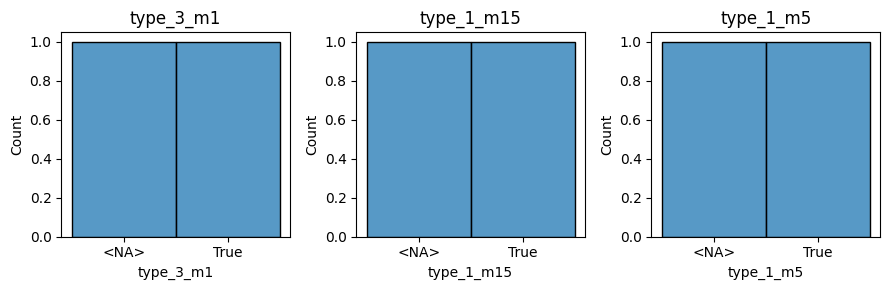

In [69]:
import seaborn as sns

plot_feature_distributions(df, type_X_cols,)



In [70]:
df

,trade_uid,potential_risk_reward,poi_1h_sc,TP_distance,SL_distance,type_1_M,type_1_m30,type_2_m1,potential_price,taken,outcome,type_3_m1,type_3_w,type_2_m15,numerical_confidence,type_3_d,account,type_2_M,type_1_w,entry_price,htf_poi_ltf_confirmation,type_1_m15,type_3_h4,poi_15m_sc,initial_return,poi_15m_liquidity_grab,type_1_h4,tp_price,type_2_d,poi_1h_liquidity_grab,side,close_price,sl_price,management_strategy,type_2_h1,type_3_m30,poi_1m_mitigation,entry_time,type_3_h1,poi_1m_sc,poi_1m_liquidity_grab,type_1_m5,session,potential_return,type_1_h1,initial_risk_reward,type_2_h4,type_3_m15,poi,poi_15m_mitigation,return_points,rr,unit_test,poi_1h_mitigation,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_close_early,management_strategy_no_management,outcome_be,outcome_loss,outcome_win
10,2,NaN,<NA>,85.97,3.09,<NA>,<NA>,<NA>,NaN,True,NaN,<NA>,<NA>,<NA>,NaN,<NA>,mt5_vantage,<NA>,<NA>,2914.03,<NA>,<NA>,<NA>,<NA>,85.97,<NA>,<NA>,3000.00,<NA>,<NA>,long,NaN,2910.94,no_management,<NA>,<NA>,<NA>,2025-02-18 14:10:00,<NA>,<NA>,<NA>,<NA>,new_york,NaN,<NA>,27.822006,<NA>,<NA>,None,<NA>,NaN,NaN,<NA>,<NA>,False,False,False,False,False,True,False,False,False
11,4,38.420694,True,-59.13,-14.69,<NA>,<NA>,<NA>,21600.0,<NA>,NaN,True,<NA>,<NA>,5.0,<NA>,ideal,<NA>,<NA>,22164.40,True,True,<NA>,False,-59.13,False,<NA>,22105.27,<NA>,True,short,22105.27,22179.09,be_after_push,<NA>,<NA>,False,2025-02-22 15:11:00,<NA>,True,False,True,new_york,-564.4,<NA>,4.025187,<NA>,<NA>,"(poi_1h_sc, poi_1h_liquidity_grab, poi_1m_sc)",False,-59.13,4.025187,<NA>,False,False,True,False,True,False,False,False,False,False


In [75]:
from src.analysis import *
from src.features import *


logging.getLogger().setLevel(logging.DEBUG)

def summarize_trade(trade: jr.Trade, df: pd.DataFrame):    
    df = df[df['trade_uid'] == trade.uid]
    if len(df) == 0:
        logging.warning(f"Trade {trade.uid} not found in df")
    display(df)
    display(trade)
    
    pp(trade.get_tags_dict())
    
    features = used_feature_classes(df)
    
    print(f"Features: {features}")
    pp(features)
    
    
summarize_trade(jr.j.trades[0], df)


2025-03-15 18:31:10 - root - WARNING - Trade 1005 not found in df


,trade_uid,potential_risk_reward,poi_1h_sc,TP_distance,SL_distance,type_1_M,type_1_m30,type_2_m1,potential_price,taken,outcome,type_3_m1,type_3_w,type_2_m15,numerical_confidence,type_3_d,account,type_2_M,type_1_w,entry_price,htf_poi_ltf_confirmation,type_1_m15,type_3_h4,poi_15m_sc,initial_return,poi_15m_liquidity_grab,type_1_h4,tp_price,type_2_d,poi_1h_liquidity_grab,side,close_price,sl_price,management_strategy,type_2_h1,type_3_m30,poi_1m_mitigation,entry_time,type_3_h1,poi_1m_sc,poi_1m_liquidity_grab,type_1_m5,session,potential_return,type_1_h1,initial_risk_reward,type_2_h4,type_3_m15,poi,poi_15m_mitigation,return_points,rr,unit_test,poi_1h_mitigation,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_close_early,management_strategy_no_management,outcome_be,outcome_loss,outcome_win


Trade(uid='1005', tags=[Tag(timestamp=None, key='type_1_h4', value=True), Tag(timestamp=None, key='type_2_h4', value=True), Tag(timestamp=None, key='type_3_h4', value=True), Tag(timestamp=None, key='unit_test', value=True), Tag(timestamp=None, key='account', value='test_account'), Tag(timestamp=None, key='entry_price', value=1.1435), Tag(timestamp=None, key='sl_price', value=1.1484999999999999), Tag(timestamp=None, key='tp_price', value=1.12630312395612), Tag(timestamp=None, key='close_price', value=1.1491), Tag(timestamp=None, key='SL_distance', value=-0.004999999999999893), Tag(timestamp=None, key='TP_distance', value=-0.017196876043879872), Tag(timestamp=None, key='return', value=0.005600000000000049), Tag(timestamp=None, key='side', value='short'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-03-03 03:39:57.626088612')), Tag(timestamp=None, key='rr', value=-1.1200000000000339), Tag(timestamp=None, key='outcome', value='loss'), Tag(timestamp=None, key='htf_poi_ltf_con

{'type_1_h4': True,
 'type_2_h4': True,
 'type_3_h4': True,
 'unit_test': True,
 'account': 'test_account',
 'entry_price': 1.1435,
 'sl_price': 1.1484999999999999,
 'tp_price': 1.12630312395612,
 'close_price': 1.1491,
 'SL_distance': -0.004999999999999893,
 'TP_distance': -0.017196876043879872,
 'return': 0.005600000000000049,
 'side': 'short',
 'entry_time': Timestamp('2025-03-03 03:39:57.626088612'),
 'rr': -1.1200000000000339,
 'outcome': 'loss',
 'htf_poi_ltf_confirmation': True,
 'numerical_confidence': 4,
 'management_strategy': 'be_after_push',
 'session': 'tokyo',
 'initial_risk_reward': 3.4393752087760476,
 'initial_return': -0.017196876043879872}


AttributeError: type object 'Confidence' has no attribute 'ALL_TAGS'